# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# Step 1

The visual evaluation of the data

Any potential relationship between columns/variables/features

In [2]:
Tit=pd.read_csv('Titanic.csv')

In [3]:
Tit.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


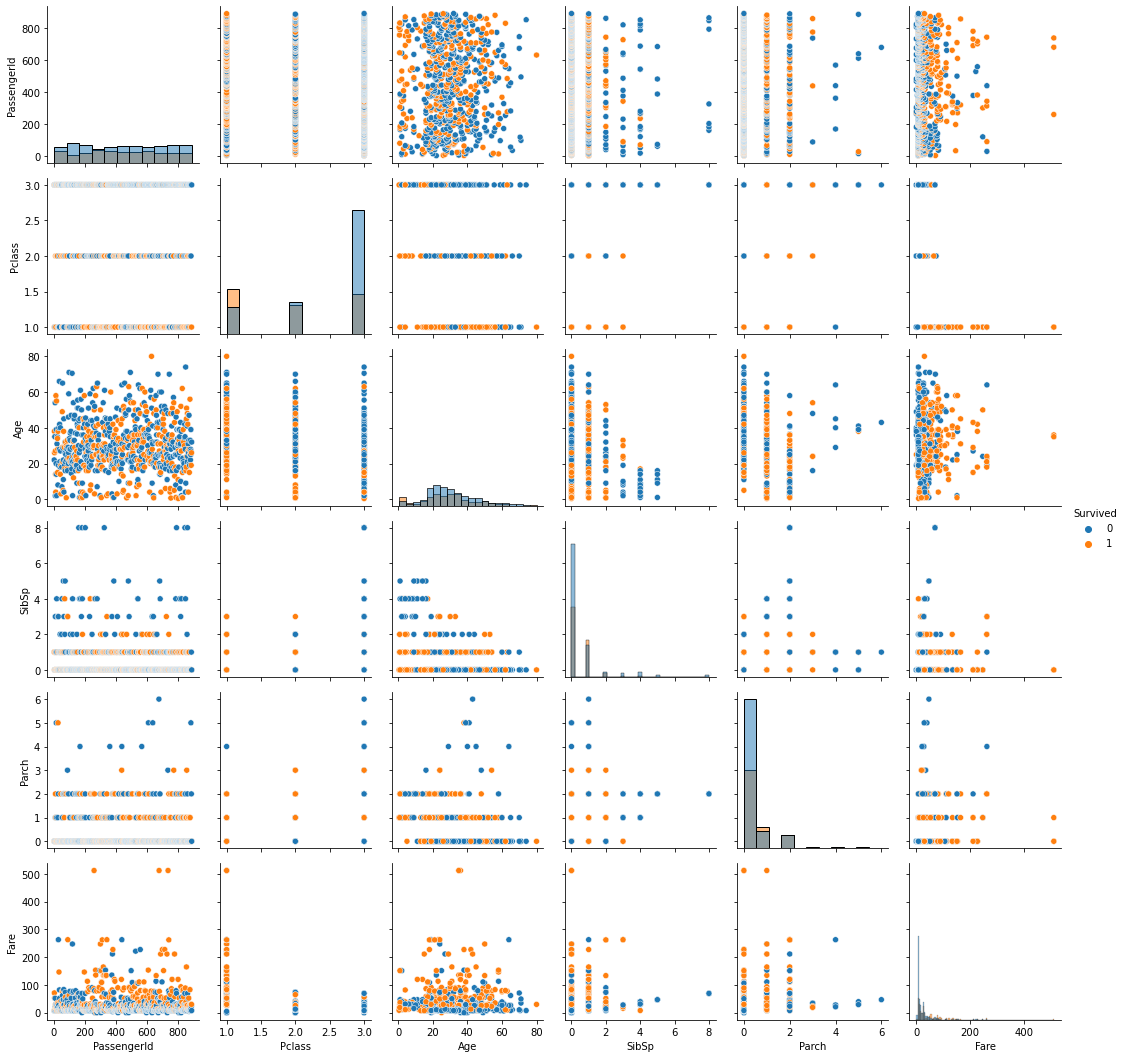

In [4]:
g = sns.PairGrid(Tit, hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

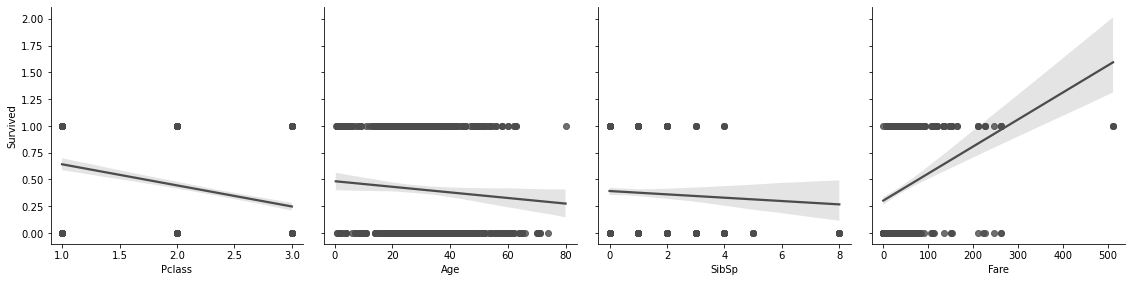

In [5]:
g = sns.PairGrid(Tit, y_vars=['Survived'], x_vars=['Pclass', 'Age', 'SibSp', 'Fare'], height=4)
g.map(sns.regplot, color=".3")

There is a relationship between the Class, Age, and Sex of passengers and Surviving

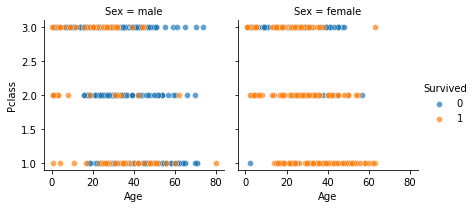

In [6]:
#plot the categotical data
g = sns.FacetGrid(Tit, col="Sex", hue="Survived")
g.map(sns.scatterplot, "Age", "Pclass", alpha=.7)
g.add_legend()

investigate how many missing data, and where are they

<AxesSubplot:>

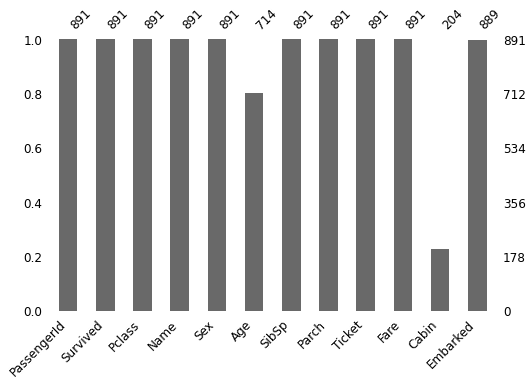

In [7]:
# use missingno.. it gives you also the number of missing vlaues per column
msno.bar(Tit,figsize=(8,5), fontsize=12) # it shows the number of non-null or non-nan values

# Step 2
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [8]:
f"the number of survived passerngers:{Tit['Survived'].value_counts()[1]} and died {Tit['Survived'].value_counts()[0]}"

'the number of survived passerngers:342 and died 549'

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

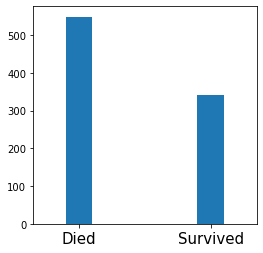

In [9]:
ax =Tit['Survived'].value_counts().plot(kind='bar',width=.2, figsize=(4,4))
ax.set_xticklabels(['Died', 'Survived'], rotation=0, fontsize=15)

# Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [10]:
#creat a proportional table
table_1=Tit.pivot_table(values=['Survived'], index=['Pclass'])
print(f"""the proportion of survived passerngers in 1st class is: {table_1.iloc[0]['Survived']*100:3.3f}% \n
for the second 2nd class is: {table_1.iloc[1]['Survived']*100:3.3f}% \n
and 3d class is: {table_1.iloc[2]['Survived']*100:3.3f}%""")

the proportion of survived passerngers in 1st class is: 62.963% 

for the second 2nd class is: 47.283% 

and 3d class is: 24.236%


# Step 4
Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

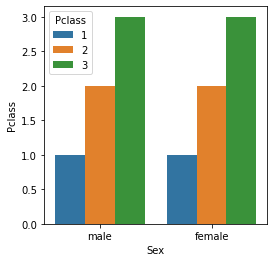

In [11]:
#barplot with seaborn
plt.figure(figsize=(4,4))
sns.barplot(data=Tit,x="Sex", y="Pclass", hue="Pclass",linewidth = 3)

# Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

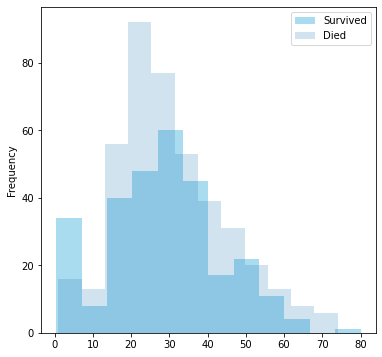

In [12]:
plt.figure(figsize=(6,6))
Tit['Age'].loc[Tit['Survived']== 1].plot.hist(label='Survived', alpha=0.7,bins=12, color = "skyblue")
Tit['Age'].loc[Tit['Survived']== 0].plot.hist(label='Died' ,alpha=0.2, bins=12)
plt.legend()

# Step 6
Calculate the average age for survived and drowned passengers separately.

In [13]:
table2=Tit.pivot_table(values=['Age'], index=['Survived'], aggfunc=np.mean)
print(f"""the average age of drowned passerngers is: {table2.iloc[0]['Age']:0.0f} \n
the average age of the survived passengers is: {table2.iloc[1]['Age']:0.0f}""")

the average age of drowned passerngers is: 31 

the average age of the survived passengers is: 28


# Step 7
Replace missing age values by the mean age.

In [14]:
#Tit['Age'].fillna(np.mean, inplace=True)

In [55]:
Tit.isna().sum();

In [61]:
#now fill the missing data
Tit.fillna({'Age':Tit['Age'].mean()}, inplace=True)

In [63]:
Tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [34]:
Tit_table=Tit.filter(['Pclass','Sex','Survived'])
Tit_prop=Tit_table.pivot_table(index=['Pclass','Sex'], columns=['Survived'], aggfunc=len)
Tit_prop

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [35]:
Tit_prop.reset_index(inplace=True)

Text(0.5, 1.0, 'Passengers who survived')

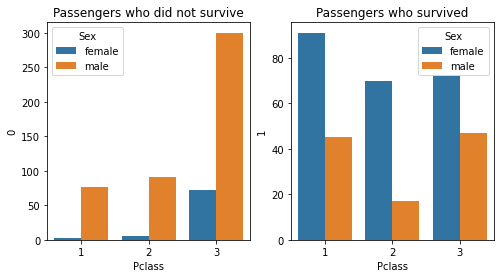

In [169]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.barplot(data=Tit_prop,x="Pclass", y=0, hue="Sex",linewidth = 3)
plt.title('Passengers who did not survive')
plt.subplot(1, 2, 2)
sns.barplot(data=Tit_prop,x="Pclass", y=1, hue="Sex",linewidth = 3)
plt.title('Passengers who survived')

# removal  and filling of missing data

check the missing data now

In [38]:
#the percentage of missing data in each column
Tit.isna().sum()/len(Tit)*100;

 Missing values: 77% of Cabin | 19% of Age | 2% of Embarked
 
 Embarked and Age have to be filled, while Cabin should be removed

In [39]:
Titanic=Tit.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [40]:
#first remove the cabin column
#Tit.drop('Cabin',axis =1, inplace=True)
#Tit.drop(['Name', 'Ticket'],axis =1, inplace=True)

In [41]:
#find the mode of embarked
embar_mode=Titanic['Embarked'].mode()
embar_mode=embar_mode[0]
Titanic['Embarked'].fillna(embar_mode, inplace=True)

In [42]:
#find the median for the Age according to Pclass
Titanic['Age'].fillna(Titanic.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [153]:
#check 
Titanic.isna().sum();

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare')])

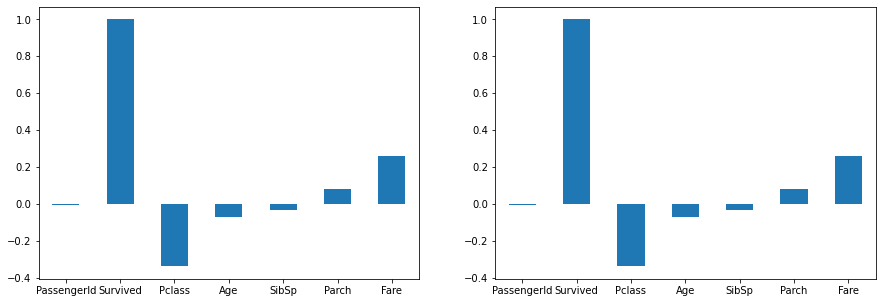

In [44]:
xx=Titanic.corr()['Survived']
xxx=Tit.corr()['Survived']
plt.figure(figsize=[15, 5])
plt.xticks(rotation=0)

plt.subplot(1, 2, 1)
xxx.plot(kind='bar')#after removing the missing data
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
xx.plot(kind='bar')#before removing the missing data
plt.xticks(rotation=0)

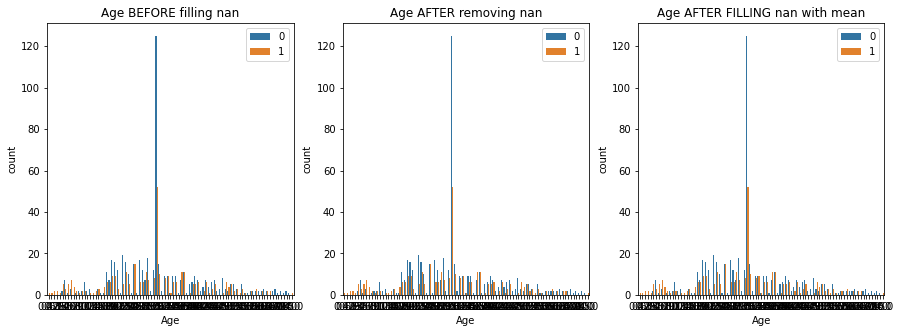

In [65]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st element
sns.countplot(data=Tit, x='Age', hue='Survived')
plt.legend(loc='upper right')
plt.title('Age BEFORE filling nan')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2rd element
sns.countplot(data=Titanic, x='Age', hue='Survived')
plt.title('Age AFTER removing nan')
plt.legend(loc='upper right')

plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2rd element
sns.countplot(data=Tit, x='Age', hue='Survived')
plt.title('Age AFTER FILLING nan with mean')
plt.legend(loc='upper right')

# 2nd Project: Classification

# the original version of the dataset will be used

In [66]:
#Import Statements
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline

# step one: split 

In [175]:
full_data=pd.read_csv('Titanic.csv')

In [298]:
#prepare y and x dataframes for the machine learning process
X=full_data.drop(['Name','Survived','Cabin','Ticket','Embarked', 'PassengerId'], axis=1)
y=full_data['Survived']

In [299]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833


In [178]:
#split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=3,test_size=0.20)

In [179]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

# step two: Feature engineering
-One-Hot-Encoding

In [180]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [181]:
#use get_dummies to do One-Hot encoding
x_train= x_train.merge(pd.get_dummies(x_train['Sex']), left_index=True, right_index=True)
x_test= x_test.merge(pd.get_dummies(x_test['Sex']), left_index=True, right_index=True)

In [182]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 9), (712,), (179, 9), (179,))

In [183]:
#I should rename the female_y as 'sex' so i can remove the other columns 
x_train.rename(columns={'female':'sex'}, inplace=True)
x_test.rename(columns={'female':'sex'}, inplace=True)

In [184]:
x_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,sex,male
395,396,3,male,22.0,0,0,7.7958,0,1
85,86,3,female,33.0,3,0,15.8500,1,0


In [185]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 9), (712,), (179, 9), (179,))

In [186]:
x_train.drop(['Sex','male'],axis=1, inplace=True)
x_test.drop(['Sex','male'],axis=1, inplace=True)

In [187]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

****another way to One-Hot encoding is with replace function

In [188]:
# this is just an option but was not used.......
Tit.replace({'female':1, 'male':0}).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


-Imputation

In [189]:
#fill the missing values with the median of the age
x_train.fillna({'Age':x_train['Age'].median()}, inplace=True)
x_test.fillna({'Age':x_test['Age'].median()}, inplace=True)

In [190]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

Text(0.5, 1.0, 'distribution of Age-Test')

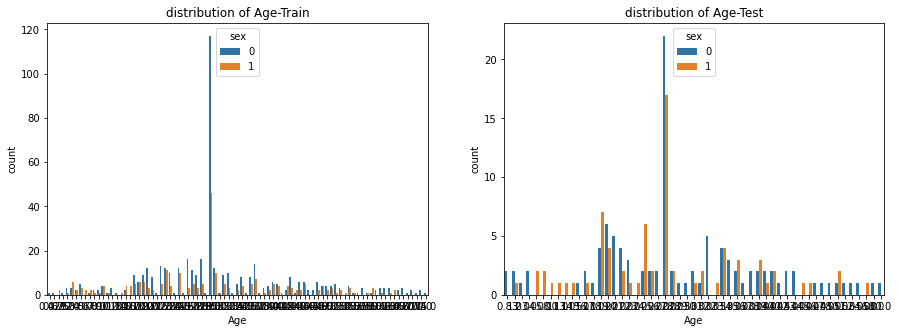

In [191]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st element
sns.countplot(data=x_train, x='Age', hue='sex')
plt.title('distribution of Age-Train')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2rd element
sns.countplot(data=x_test, x='Age', hue='sex')
plt.title('distribution of Age-Test')

I have no clue why Males are over-represented in my train dataset

I do expect a big difference between predicted y and true y 

# Scale the data

In [267]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [268]:
#Instanciate the Scaler
#scaler=StandardScaler()

In [269]:
#scale the training dataset and save the parameters
#Xtrain_scaled = scaler.fit_transform(x_train)

In [270]:
#now scale the test dataset using parameters from the training dataset
#Xtest_scaled = scaler.transform(x_test)

In [274]:
#x_train.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex
146,147,3,27.0,0,0,7.7958,0
195,196,1,58.0,0,0,146.5208,1
786,787,3,18.0,0,0,7.4958,1


In [271]:
Xtrain_scaled

array([[-1.20377822,  0.83830655, -0.22980341, ..., -0.44091934,
        -0.4835341 , -0.71307403],
       [-1.01283054, -1.53495097,  2.11355417, ..., -0.44091934,
         2.28496079,  1.40237893],
       [ 1.29023229,  0.83830655, -0.91013303, ..., -0.44091934,
        -0.48952111,  1.40237893],
       ...,
       [-0.8023984 , -0.34832221,  1.81118545, ..., -0.44091934,
        -0.12023812, -0.71307403],
       [ 0.81481153,  0.83830655, -0.75894867, ..., -0.44091934,
        -0.48095569, -0.71307403],
       [ 1.63315873, -0.34832221, -0.15421123, ..., -0.44091934,
        -0.16015154,  1.40237893]])

# LogisticRegression

In [276]:
#initialize the model
m = LogisticRegression(max_iter=1000)

In [277]:
# now fit the model on the scaled Xtrain_scaled data and the labels stored in y_train
m.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [278]:
#score for train
score = m.score(x_train,y_train)
f"Training score: {score:5.3f}"   

'Training score: 0.805'

In [279]:
#score for test
test_score = m.score(x_test, y_test)
f"Test score: {test_score:1.3f}" 

'Test score: 0.765'

In [280]:
ypred = m.predict(x_test)

In [282]:
probabilities = m.predict_proba(x_test).round(2)

In [284]:
#logistic regression with 10000 iterations
model_logreg = LogisticRegression(max_iter=10000)
model_logreg.fit(x_train, y_train)

y_train_predict_logreg = model_logreg.predict(x_train)
y_test_predict_logreg = model_logreg.predict(x_test)

print(model_logreg.score(x_train, y_train),
      model_logreg.score(x_test, y_test))

0.8047752808988764 0.7653631284916201


In [285]:
print(f'the coef is: {m.coef_}')
print(f'the intercept is: {m.intercept_}')

the coef is: [[-2.49293551e-04 -1.01124538e+00 -4.38251158e-02 -5.00801517e-01
  -1.45715480e-01  1.00397746e-02  2.69131779e+00]]
the intercept is: [2.21048229]


# Evaluate the Logistic Regression

In [120]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [286]:
#get precision score, recall and the F1 (harnomic mean of score and recall)
print(f"""precision={round(precision_score(y_test, ypred),2)} \n
recall={round(recall_score(y_test, ypred),2)}\n
The harmonic mean (F1 score)= {round(f1_score(y_test,ypred),2)}""")

precision=0.68 

recall=0.74

The harmonic mean (F1 score)= 0.71


In [141]:
#plot AUC to calculate the area under the ROC curve  ..“receiver operating characteristic”
#probabilities = m.predict_proba(Xtest_scaled).round(2)

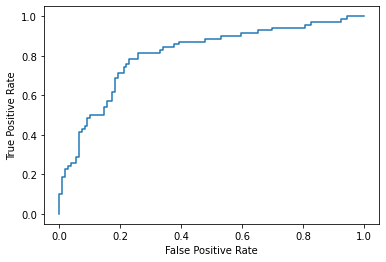

In [287]:
#plot ROC
import sklearn.metrics as metrics
ypred_P = m.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  ypred_P)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'False Positive Rate')

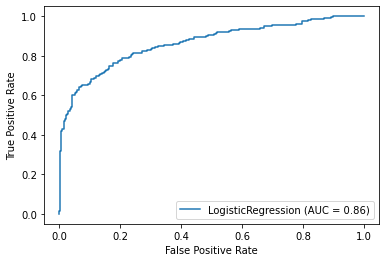

In [288]:
plot_roc_curve(m, x_train, y_train) 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [292]:
#check and plot the confusion matrix
confusion_matrix(ypred, y_test)

array([[85, 18],
       [24, 52]], dtype=int64)

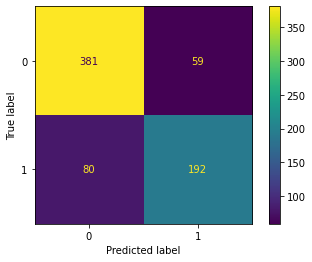

In [293]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(m, x_train, y_train, normalize=None)

In [140]:
y_test.shape, ypred.shape

((179,), (179,))

# Suppose you classify all points with a probability > 0.9 as positive.

How does the result of your prediction change?

In [235]:
##probability > 0.9 

result = map(lambda x:int(x[0] > 0.9), probabilities)
proba=list(result)
len(proba)

179

In [236]:
#get precision score, recall and the F1 (harnomic mean of score and recall)
print(f"""precision={round(precision_score(y_test, proba),2)} \n
recall={round(recall_score(y_test, proba),2)}\n
The harmonic mean (F1 score)= {round(f1_score(y_test,proba),2)}""")

precision=0.11 

recall=0.06

The harmonic mean (F1 score)= 0.07


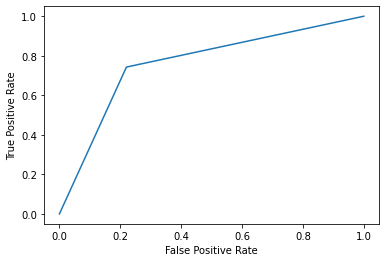

In [237]:
fpr, tpr, _ = metrics.roc_curve(y_test,  ypred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
#we got too many false negatives......

import collections
counter_before =collections.Counter(ypred)
counter_after =collections.Counter(proba)
print(counter_before, 'After changing  threshold to > 0.9 ', +counter_after)

Counter({0: 103, 1: 76}) After changing  threshold to > 0.9  Counter({0: 142, 1: 37})


How does it change if you change the threshold to > 0.1?

In [260]:
##probability > 0.9 

result_1 = map(lambda x:int(x[0] > 0.1), probabilities)
proba_1=list(result_1)
len(proba_1)

179

In [261]:
#get precision score, recall and the F1 (harnomic mean of score and recall)
print(f"""precision={round(precision_score(y_test, proba_1),2)} \n
recall={round(recall_score(y_test, proba_1),2)}\n
The harmonic mean (F1 score)= {round(f1_score(y_test,proba_1),2)}""")

precision=0.33 

recall=0.76

The harmonic mean (F1 score)= 0.46


In [273]:
#we got too many false positives......
counter_1 =collections.Counter(proba_1)
print(counter_before, 'After changing  threshold to > 0.1 ', counter_1)

Counter({0: 103, 1: 76}) After changing  threshold to > 0.1  Counter({1: 160, 0: 19})


# Cross-validation for logistic regression sklearn

In [143]:
from sklearn.model_selection import cross_val_score

In [296]:
scores = cross_val_score(m, x_train, y_train, cv=5)

In [297]:
print(f"""cross-validation scores:{scores} \n
Mean cross-validation score:{scores.mean()}""")

cross-validation scores:[0.77622378 0.7972028  0.83098592 0.72535211 0.88028169] 

Mean cross-validation score:0.8020092583472866


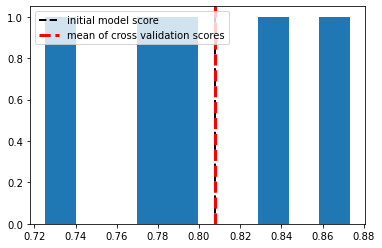

In [146]:
#plot the scores
plt.hist(scores, bins=10) 
#line fore the score from l-r
plt.axvline(score, color='black', linestyle='--', linewidth=2, label='initial model score')
plt.axvline(score.mean(), color='r', linestyle='--', linewidth=3, label='mean of cross validation scores')
plt.legend()

# Random Forest with sklearn


In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
#initiate model
model = RandomForestClassifier(n_estimators=1000) #with default settings

In [149]:
#fit the model to the training datasets
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [150]:
#check the score of the model on training sets
#model.score(x_train, y_train)

0.9775280898876404

In [166]:
#check the score on the test sets
model.score(x_test, y_test)

0.770949720670391

# Logistic regression using statsmodel..

In [264]:
# so the exercise statsmodel...
import statsmodels.api as sm

logit = sm.Logit(y_train, x_train)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.438012
         Iterations 7
PassengerId    0.000277
Pclass        -0.525710
Age           -0.024854
SibSp         -0.485347
Parch         -0.258915
Fare           0.018830
sex            2.844130
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3414
Time:                        14:00:29   Log-Likelihood:                -311.86
converged:                       True   LL-Null:                       -473.51
Covariance Type:            nonrobust   LLR p-value:                 8.296e-67
                  coef    std err          z      P>|z|      [0.025      0.975]
---

# Submitt to Kaggel

In [265]:
###### it did not work caus my file has less than 419 rows and mine is 180 entries #########

#prepare probabilities .... not on x_test rather on (test.csv)
#take your model that u chosed and test.csv as dataframe and predict using its features

probabilities = m.predict_proba(Xtest_scaled).round(2)
# transform the number into 0 or 1
result = map(lambda x:int(x[0] >= 0.5), probabilities)
proba=list(result)
len(proba)

#to submission to Kaggel
submission = pd.DataFrame({'PassengerId':x_test['PassengerId'],'Survived':proba})
#submission.to_csv('C:/Users/Lenovo/costmary-function-student-code/week2/Kaggel_submission.csv')

In [295]:
# Mannies Script
# Transform columns using ColumnTransformer for age and embarked pipes
transformer = ColumnTransformer([
    ('age_pipe', age_pipeline, ['Age']),
    ('embarked_pipe', embarked_pipeline, ['Embarked']),
    ('scaled_fare', StandardScaler(), ['Fare']),
    ('onehot_cateorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex', 'Pclass']),
]);

NameError: name 'ColumnTransformer' is not defined